**Downloading the Datasets (MNIST**)

In [ ]:
#downloading the dataset from keras.datasets
from keras.datasets import mnist
((trainX, trainY), (testX, testY)) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#train features 
print("Train X shape:",trainX.shape)
#train label
print("Train Y shape:",trainY.shape)
#test features
print("Test X shape:",testX.shape)
#test label
print("Test Y shape:",testY.shape)

Train X shape: (60000, 28, 28)
Train Y shape: (60000,)
Test X shape: (10000, 28, 28)
Test Y shape: (10000,)


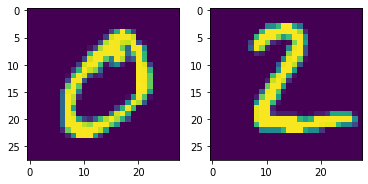

In [ ]:
#plotting few datapoints 
import matplotlib.pyplot as plt

#training_datapoints
plt.subplot(121)
plt.imshow(trainX[1])

#testing_datapoints
plt.subplot(122)
plt.imshow(testX[1])

**Let's build the model!**

In [ ]:
#required libraries
import torch
from torch.nn import *
from torch.optim import Adam
from torch.autograd import Variable
import numpy as np

In [ ]:
#reshaping the data into required format
train_x=trainX.reshape(60000,1,28,28)

#converting the numpy array into tensor
train_x=torch.from_numpy(train_x)
train_x.shape

torch.Size([60000, 1, 28, 28])

In [ ]:
#converting the lable into integer
train_y=trainY.astype(int)

#converting the numpy array into tensor
train_y=torch.from_numpy(train_y)
train_y.shape

torch.Size([60000])

In [ ]:
#inherited class
class model_cnn(Module):   
    def __init__(self):
        super(model_cnn, self).__init__()

        #cnn layer
        self.cnn_layers = Sequential(
            #layer 1 - convolution layer, pooling layer
            
            #input - 28,28,1 
            Conv2d(1, 4, kernel_size=2, stride=1, padding=1),
            #convolution - 29,29,4 
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            #pooling - 14,14,4
            
            #layer 2 - convolution layer, pooling layer
    
            #input - 14,14,2
            Conv2d(4, 4, kernel_size=2, stride=1, padding=1),
            #convolution - 15,15,4
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2)
            #pooling - 7,7,4
            
        )
        #fully connected layer
        
        #input - 4*7*7
        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        #output - 10
        
        )

    #forward pass    
    def forward(self, x):
        #layer 1 and layer 2
        x = self.cnn_layers(x)
        #converting the (7,7,4) into 4*7*7
        x = x.view(x.size(0), -1)
        #fully connected layer
        x = self.linear_layers(x)
        return x

In [ ]:
#object of class model_cnn
model=model_cnn()

In [ ]:
model

model_cnn(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)

In [ ]:
#Adan optimizer
optimizer= Adam(model.parameters(), lr=0.07)

#loss function
criterion = CrossEntropyLoss()

In [ ]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0
    
    #getting the training datapoints
    x_train,y_train=Variable(train_x),Variable(train_y)
    
    #if GPU is available, set to GPU format
    if torch.cuda.is_available():
        model.cuda()
        x_train = x_train.cuda()
        y_train = y_train.cuda()

    #clearing the Gradients 
    optimizer.zero_grad()
    
    #converting the input into float
    x_train=x_train.float()
    
    #predict the output
    predicted_output=model(x_train)
    
    #compute the loss 
    loss=criterion(predicted_output, y_train)
    
    #appending the loss to view the preformance of model
    train_losses.append(loss)
    
    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    print("Epoch : ",epoch,"loss : ",loss)


In [ ]:
#number of epoch
no_epoch=25
train_losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(2.6738, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  2 loss :  tensor(5.6253, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  3 loss :  tensor(4.9357, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  4 loss :  tensor(4.4842, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  5 loss :  tensor(2.6616, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  6 loss :  tensor(1.6468, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  7 loss :  tensor(1.5960, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  8 loss :  tensor(1.5266, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  9 loss :  tensor(1.5746, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  10 loss :  tensor(1.5542, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  11 loss :  tensor(1.5026, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  12 loss :  tensor(1.4602, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  13 loss :  tensor(1.4115, device='cuda:0', grad_fn=<

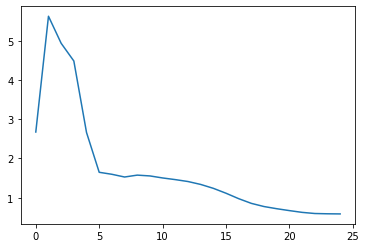

In [ ]:
#plotting the loss, loss is decreasing for each epoch
plt.plot(train_losses, label='Training loss')
plt.show()

**Evaluation - Training accuracy**

In [ ]:
#setting not to calculate gradients
with torch.no_grad():
    train_x=train_x.float()
    #if GPU is available
    if torch.cuda.is_available():
        #predicting the output for traning datapoints
        train_x=train_x.cuda()
    output=model(train_x)


In [ ]:
#applying the softmax (0 to 1)
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())

#finding the max with respect to x-axis
predictions = np.argmax(prob, axis=1)


In [ ]:
predictions

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
#training accuracy
from sklearn.metrics import accuracy_score
accuracy_score(train_y, predictions)


0.8271166666666666

**Evaluation - Training accuracy**

In [ ]:
#converting the testing datapoints into required format
test_x=testX.reshape(10000,1,28,28)
test_x=torch.from_numpy(test_x)

test_y=testY.astype(int)
text_y=torch.from_numpy(test_y)

In [ ]:
#setting not to calculate gradients
with torch.no_grad():
    #if GPU is available
    if torch.cuda.is_available():
        test_x=test_x.cuda()
    test_x=test_x.float()
    #predicting the output for testing datapoints
    test_output=model(test_x)


In [ ]:
#applying the softmax (0 to 1)
softmax = torch.exp(test_output).cpu()
prob = list(softmax.numpy())

#finding the max with respect to x-axis
test_prediction = np.argmax(prob, axis=1)


In [ ]:
#testing accuracy
accuracy_score(test_y, test_prediction)


0.8347